In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("mergedfile_patient_age_yearsall.txt", sep="\t")


In [2]:
mutation_cols = df.columns[1:12941]    
meta_cols_before = df.columns[:1]     
meta_cols_after = df.columns[12941:]    
new_cols = pd.DataFrame(index=df.index)
for col in mutation_cols:
    parts = col.split(',')
    base = parts[0]      
    alleles = parts[1:]  
    col_numeric = pd.to_numeric(df[col], errors='coerce')
    new_cols[base] = col_numeric.apply(lambda x: 1 if x > 0 else 0)
    for i, allele in enumerate(alleles, start=1):
        allele_col = base[:-1] + allele  
        new_cols[allele_col] = col_numeric.apply(lambda x: 1 if x == i else 0)
final_df = pd.concat([df[meta_cols_before], new_cols, df[meta_cols_after]], axis=1)

In [3]:
cols_with_star = [col for col in final_df.columns if '*' in col]
print(cols_with_star[:10])  

['A1*', 'T2*', 'T3*', 'A4*', 'A5*', 'A6*', 'G7*', 'G8*', 'T9*', 'T10*']


In [4]:
final_df = final_df.drop(columns=cols_with_star)

In [5]:
final_df

,strain,A1C,A1G,A1T,T2G,T2K,T2A,T2C,T3C,T3A,...,A29875G,A29876G,A29877T,A29891G,A29892G,Location,Gender,Patient age,Additional host information,Lineage
0,hCoV-19/Turkey/TSIM_Ankara_140111_978/2024,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Europe / Turkey,Male,87.00,Severe,B
1,hCoV-19/Slovakia/ruvzbb_24_02_00000120/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,Europe / Slovakia / Okres Presov,Female,91.00,Severe,B.1.1.529
2,hCoV-19/Brazil/RJ-FIOCRUZ-51/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,South America / Brazil / Rio de Janeiro / Rio ...,Male,35.00,Severe,BA.1
3,hCoV-19/Fujian/FCDC-FZ9970725/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,Asia / China / Fujian,Male,70.00,Severe,EG.5.1.1
4,hCoV-19/Fujian/FCDC-XM010309HG/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,Asia / China / Fujian,Female,19.00,Severe,HK.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13972,hCoV-19/Spain/CT-LabRefCat-9317885r/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,Europe / Spain / Catalunya / Mataro,Male,94.00,Severe,JN.1.4 (consensus call)
13973,hCoV-19/Spain/CT-LabRefCat-6385185r/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,Europe / Spain / Catalunya / Mataro,Female,81.00,Severe,KP.3.1.1 (consensus call)
13974,hCoV-19/USA/NY-WMC-6178/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,North America / USA / New York / Westchester C...,Male,0.42,Severe,JN.1.4 (consensus call)
13975,hCoV-19/Mexico/GUA_CIAD_01001002/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,North America / Mexico / Guanajuato,Female,26.00,Severe,XBB.1.16.15


In [6]:
final_df.drop(columns=['Location', 'Lineage', 'Additional host information'], inplace=True)

In [7]:
metadatatwo = pd.read_csv("metadata2.txt", sep="\t") 
finalfile = pd.merge(final_df, metadatatwo, on="strain")

In [8]:
finalfile

,strain,A1C,A1G,A1T,T2G,T2K,T2A,T2C,T3C,T3A,...,A29877T,A29891G,A29892G,Gender,Patient age,clade,Nextclade_pango,region,country,category
0,hCoV-19/Turkey/TSIM_Ankara_140111_978/2024,0,0,0,0,0,0,0,0,0,...,0,0,0,Male,87.00,19A,B,Europe,Turkey,Severe
1,hCoV-19/Slovakia/ruvzbb_24_02_00000120/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,91.00,recombinant,XCU,Europe,Slovakia,Severe
2,hCoV-19/Brazil/RJ-FIOCRUZ-51/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,35.00,21K,BA.1,South America,Brazil,Severe
3,hCoV-19/Fujian/FCDC-FZ9970725/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,70.00,23F,EG.5.1.1,Asia,China,Severe
4,hCoV-19/Fujian/FCDC-XM010309HG/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,19.00,23H,HK.3,Asia,China,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13972,hCoV-19/Spain/CT-LabRefCat-9317885r/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,94.00,24A,JN.1.4.9,Europe,Spain,Severe
13973,hCoV-19/Spain/CT-LabRefCat-6385185r/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,81.00,24E,KP.3.1.1,Europe,Spain,Severe
13974,hCoV-19/USA/NY-WMC-6178/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,0.42,24A,JN.1.4,North America,USA,Severe
13975,hCoV-19/Mexico/GUA_CIAD_01001002/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,26.00,23B,XBB.1.16.15,North America,Mexico,Severe


In [9]:
final_df=finalfile

In [10]:
final_df

,strain,A1C,A1G,A1T,T2G,T2K,T2A,T2C,T3C,T3A,...,A29877T,A29891G,A29892G,Gender,Patient age,clade,Nextclade_pango,region,country,category
0,hCoV-19/Turkey/TSIM_Ankara_140111_978/2024,0,0,0,0,0,0,0,0,0,...,0,0,0,Male,87.00,19A,B,Europe,Turkey,Severe
1,hCoV-19/Slovakia/ruvzbb_24_02_00000120/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,91.00,recombinant,XCU,Europe,Slovakia,Severe
2,hCoV-19/Brazil/RJ-FIOCRUZ-51/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,35.00,21K,BA.1,South America,Brazil,Severe
3,hCoV-19/Fujian/FCDC-FZ9970725/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,70.00,23F,EG.5.1.1,Asia,China,Severe
4,hCoV-19/Fujian/FCDC-XM010309HG/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,19.00,23H,HK.3,Asia,China,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13972,hCoV-19/Spain/CT-LabRefCat-9317885r/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,94.00,24A,JN.1.4.9,Europe,Spain,Severe
13973,hCoV-19/Spain/CT-LabRefCat-6385185r/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,81.00,24E,KP.3.1.1,Europe,Spain,Severe
13974,hCoV-19/USA/NY-WMC-6178/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Male,0.42,24A,JN.1.4,North America,USA,Severe
13975,hCoV-19/Mexico/GUA_CIAD_01001002/2024,0,0,0,1,0,0,0,1,0,...,1,1,1,Female,26.00,23B,XBB.1.16.15,North America,Mexico,Severe


In [11]:
final_df['category'] = pd.get_dummies(final_df['category'])['Severe'].astype(int)
print(final_df['category'].head())

0    1
1    1
2    1
3    1
4    1
Name: category, dtype: int32


In [12]:
final_df['Gender'] = pd.get_dummies(final_df['Gender'])['Female'].astype(int)
print(final_df['Gender'].head())

0    0
1    1
2    0
3    0
4    1
Name: Gender, dtype: int32


In [13]:
final_df.drop(columns=['region', 'country'], inplace=True)

In [14]:
clade_dummies = pd.get_dummies(final_df ['clade'], prefix='clade').astype(int)
final_df  = pd.concat([final_df , clade_dummies], axis=1)

In [15]:
final_df  = final_df .drop(['clade', 'clade_24C'], axis = 1)

In [16]:
Nextclade_dummies = pd.get_dummies(final_df ['Nextclade_pango'], prefix='Nextclade_pango').astype(int)
final_df  = pd.concat([final_df , Nextclade_dummies], axis=1)

In [17]:
final_df = final_df.drop(['Nextclade_pango', 'Nextclade_pango_XEN'], axis = 1)

In [18]:
first_col = final_df.iloc[:, [0]]

In [19]:
first_col

,strain
0,hCoV-19/Turkey/TSIM_Ankara_140111_978/2024
1,hCoV-19/Slovakia/ruvzbb_24_02_00000120/2024
2,hCoV-19/Brazil/RJ-FIOCRUZ-51/2024
3,hCoV-19/Fujian/FCDC-FZ9970725/2024
4,hCoV-19/Fujian/FCDC-XM010309HG/2024
...,...
13972,hCoV-19/Spain/CT-LabRefCat-9317885r/2024
13973,hCoV-19/Spain/CT-LabRefCat-6385185r/2024
13974,hCoV-19/USA/NY-WMC-6178/2024
13975,hCoV-19/Mexico/GUA_CIAD_01001002/2024


In [20]:
rest = final_df.iloc[:, 1:]
rest

,A1C,A1G,A1T,T2G,T2K,T2A,T2C,T3C,T3A,A4T,...,Nextclade_pango_XEL.3,Nextclade_pango_XEP,Nextclade_pango_XEU,Nextclade_pango_XEV,Nextclade_pango_XEW,Nextclade_pango_XFB,Nextclade_pango_XFC,Nextclade_pango_XFG,Nextclade_pango_XFJ,Nextclade_pango_XFL
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13972,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13973,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13974,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13975,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
filtered_rest = rest.loc[:, (rest.sum(axis=0) >= 10)]
final_df_filtered = pd.concat([first_col, filtered_rest], axis=1)
print("Filtered shape:", final_df_filtered.shape)

Filtered shape: (13977, 9607)


In [22]:
final_df_filtered

,strain,T2G,T3C,A4T,A4C,A5G,A6R,G7T,G8T,T9C,...,Nextclade_pango_XEC.15,Nextclade_pango_XEC.18,Nextclade_pango_XEC.2,Nextclade_pango_XEC.30,Nextclade_pango_XEC.32,Nextclade_pango_XEC.4,Nextclade_pango_XEC.8,Nextclade_pango_XEC.9,Nextclade_pango_XEE,Nextclade_pango_XEK
0,hCoV-19/Turkey/TSIM_Ankara_140111_978/2024,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hCoV-19/Slovakia/ruvzbb_24_02_00000120/2024,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,hCoV-19/Brazil/RJ-FIOCRUZ-51/2024,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,hCoV-19/Fujian/FCDC-FZ9970725/2024,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,hCoV-19/Fujian/FCDC-XM010309HG/2024,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13972,hCoV-19/Spain/CT-LabRefCat-9317885r/2024,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
13973,hCoV-19/Spain/CT-LabRefCat-6385185r/2024,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
13974,hCoV-19/USA/NY-WMC-6178/2024,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
13975,hCoV-19/Mexico/GUA_CIAD_01001002/2024,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X = final_df_filtered.drop(columns=['category', 'strain'])

In [24]:
y = final_df_filtered['category']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: category, dtype: int32

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

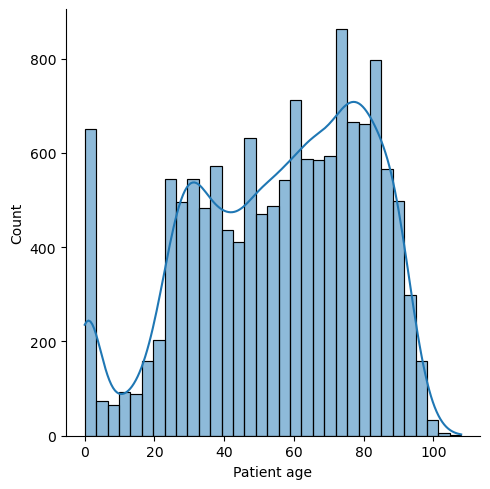

In [26]:
sns.displot(X["Patient age"], kde=True)
plt.show()

In [27]:
X_train.isnull().sum()

T2G                      0
T3C                      0
A4T                      0
A4C                      0
A5G                      0
                        ..
Nextclade_pango_XEC.4    0
Nextclade_pango_XEC.8    0
Nextclade_pango_XEC.9    0
Nextclade_pango_XEE      0
Nextclade_pango_XEK      0
Length: 9605, dtype: int64

In [28]:
X_train["Patient age"].min(), X_train["Patient age"].max(), X_train["Patient age"].mean(), X_train["Patient age"].std()

(0.0, 103.0, 55.55121813791252, 24.976544745874232)

In [29]:
X_test["Patient age"].min(), X_test["Patient age"].max(), X_test["Patient age"].mean(), X_test["Patient age"].std()

(0.04, 108.0, 55.62713519313305, 24.82169200029981)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[["Patient age"]] = scaler.fit_transform(X_train[["Patient age"]]) 
X_test[["Patient age"]] = scaler.transform(X_test[["Patient age"]]) 

In [31]:
pd.DataFrame(X_train).head()

,T2G,T3C,A4T,A4C,A5G,A6R,G7T,G8T,T9C,T10A,...,Nextclade_pango_XEC.15,Nextclade_pango_XEC.18,Nextclade_pango_XEC.2,Nextclade_pango_XEC.30,Nextclade_pango_XEC.32,Nextclade_pango_XEC.4,Nextclade_pango_XEC.8,Nextclade_pango_XEC.9,Nextclade_pango_XEE,Nextclade_pango_XEK
13935,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3065,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
12997,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
13399,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7752,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
pd.DataFrame(X_test).head()

,T2G,T3C,A4T,A4C,A5G,A6R,G7T,G8T,T9C,T10A,...,Nextclade_pango_XEC.15,Nextclade_pango_XEC.18,Nextclade_pango_XEC.2,Nextclade_pango_XEC.30,Nextclade_pango_XEC.32,Nextclade_pango_XEC.4,Nextclade_pango_XEC.8,Nextclade_pango_XEC.9,Nextclade_pango_XEE,Nextclade_pango_XEK
2629,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8370,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11219,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9619,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3678,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X_train["Patient age"].min(), X_train["Patient age"].max(), X_train["Patient age"].mean(), X_train["Patient age"].std()

(-2.2242348991472745,
 1.8998185832338077,
 3.7144461949000856e-16,
 1.0000447217191275)

In [34]:
X_test["Patient age"].min(), X_test["Patient age"].max(), X_test["Patient age"].mean(), X_test["Patient age"].std()

(-2.2226333249793595,
 2.1000153542231805,
 0.003039669863634253,
 0.9938445177905502)

In [35]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(11181, 9605)
(2796, 9605)
(11181,)
(2796,)


In [36]:
from sklearn.linear_model import LogisticRegressionCV
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

Cs = np.logspace(-2, 0, 5)  
l1_ratios = np.linspace(0.1, 1.0, 5) 



In [37]:
logreg_cv = LogisticRegressionCV(
    Cs=Cs,
    penalty='elasticnet',
    solver='saga',
    l1_ratios=l1_ratios,
    cv=7,
    max_iter=1000,
    random_state=42,
    scoring='accuracy',
    refit=True ,
    n_jobs=4
)


In [38]:
X_train = X_train.astype(np.float32)

In [39]:
logreg_cv.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([0.01      , 0.03162278, 0.1       , 0.31622777, 1.        ]),
                     cv=7, l1_ratios=array([0.1  , 0.325, 0.55 , 0.775, 1.   ]),
                     max_iter=1000, n_jobs=4, penalty='elasticnet',
                     random_state=42, scoring='accuracy', solver='saga')

In [40]:
print("Best C:", logreg_cv.C_[0])
print("Best l1_ratio:", logreg_cv.l1_ratio_[0])

Best C: 0.31622776601683794
Best l1_ratio: 0.775


In [41]:
X_test = X_test.astype(np.float32)  
y_pred = logreg_cv.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7829041487839771
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74      1070
           1       0.87      0.76      0.81      1726

    accuracy                           0.78      2796
   macro avg       0.77      0.79      0.78      2796
weighted avg       0.80      0.78      0.79      2796



In [43]:
from sklearn.metrics import roc_auc_score

y_prob = logreg_cv.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc)

ROC AUC Score: 0.8635294722820849


fpr = [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.34579439e-04
 9.34579439e-04 1.86915888e-03 1.86915888e-03 1.86915888e-03
 1.86915888e-03 2.80373832e-03 2.80373832e-03 3.73831776e-03
 3.73831776e-03 4.67289720e-03 4.67289720e-03 5.60747664e-03
 5.60747664e-03 6.54205607e-03 6.54205607e-03 8.41121495e-03
 8.41121495e-03 9.34579439e-03 9.34579439e-03 1.02803738e-02
 1.02803738e-02 1.12149533e-02 1.12149533e-02 1.21495327e-02
 1.21495327e-02 1.30841121e-02 1.30841121e-02 1.40186916e-02
 1.40186916e-02 1.58878505e-02 1.58878505e-02 1.68224299e-02
 1.68224299e-02 1.77570093e-02 1.77570093e-02 2.05607477e-02
 2.05607477e-02 2.14953271e-02 2.14953271e-02 2.24299065e-02
 2.24299065e-02 2.33644860e-02 2.33644860e-02 2.52336449e-02
 2.52336449e-02 2.61682243e-02 2.61682243e-02 2.71028037e-02
 2.71028037e-02 2.80373832e-02 2.80373832e-02 2.89719626e-02
 2.89719626e-02 2.99065421e-02 2.99065421e-02 3.08411215e-02
 3.08411215e-02 3.

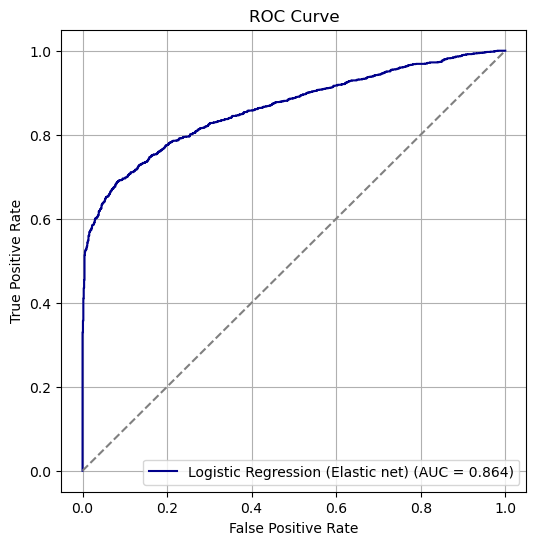

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = logreg_cv.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print('fpr =', fpr)
print('tpr =', tpr)
print('thresholds =', thresholds)
print(f"AUC = {auc_score:.3f}")
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (Elastic net) (AUC = {auc_score:.3f})", color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve_Logistic Regression (Elastic netwithout region, country).tiff', dpi=600, format='tiff')
plt.show()

In [45]:
print (logreg_cv.intercept_) 
print ()
print ((np.round(logreg_cv.coef_,5))) 
print ()
print (X_train.columns)

[12.25908048]

[[ 0.      -0.61368  0.      ...  0.       0.       0.     ]]

Index(['T2G', 'T3C', 'A4T', 'A4C', 'A5G', 'A6R', 'G7T', 'G8T', 'T9C', 'T10A',
       ...
       'Nextclade_pango_XEC.15', 'Nextclade_pango_XEC.18',
       'Nextclade_pango_XEC.2', 'Nextclade_pango_XEC.30',
       'Nextclade_pango_XEC.32', 'Nextclade_pango_XEC.4',
       'Nextclade_pango_XEC.8', 'Nextclade_pango_XEC.9', 'Nextclade_pango_XEE',
       'Nextclade_pango_XEK'],
      dtype='object', length=9605)


In [46]:
logreg_cv.coef_[0]
coeff = list(logreg_cv.coef_[0])
coeff 


[0.0,
 -0.6136800206525042,
 0.0,
 0.0,
 0.0,
 -0.22085225566043634,
 0.0,
 0.0,
 -0.4763267336629929,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05354193619739196,
 0.0,
 0.29703757980296264,
 0.14806353136793415,
 0.3040666430071714,
 0.40125859190575497,
 0.0,
 -1.1720790223887234,
 -1.2132372787964132,
 0.0,
 0.0,
 0.4698782448182618,
 0.0,
 0.0,
 0.0524642499090122,
 -0.1032782611829177,
 -0.5378120738885427,
 0.0,
 -0.6186625368336965,
 0.0,
 -0.36526388022428596,
 -0.8535601907192921,
 0.0,
 0.0,
 0.0,
 -1.3892732006546846,
 0.0,
 0.5088294032407141,
 0.0,
 0.0,
 0.005042330440960008,
 0.13412882994575223,
 0.3027685534418185,
 0.45277012030212793,
 0.17456155022330397,
 0.042329578532059604,
 0.04135883206234215,
 0.0377298435514136,
 0.0,
 0.0,
 0.0,
 0.18724826802216213,
 0.08249401569555073,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.43494094675180545,
 0.0,
 0.0,
 0.0,
 0.16271878323638228,
 0.14562408517486908,
 0.0,
 0.2752071215408756,
 0.15324702271963186,
 0.0,
 0.14607087662603838,
 0.0,
 0.0,

In [47]:
list(X_train.columns)
labels = list(X_train.columns)
labels

['T2G',
 'T3C',
 'A4T',
 'A4C',
 'A5G',
 'A6R',
 'G7T',
 'G8T',
 'T9C',
 'T10A',
 'T10C',
 'T11C',
 'A12T',
 'T13A',
 'C15A',
 'C16T',
 'T17G',
 'T18A',
 'C19G',
 'C20T',
 'C21T',
 'C21A',
 'A22T',
 'G23T',
 'G24T',
 'T25A',
 'A27G',
 'C28T',
 'C37T',
 'T41C',
 'T42C',
 'C44T',
 'C44Y',
 'A46G',
 'C59T',
 'C64T',
 'T65C',
 'C66T',
 'T78G',
 'A79G',
 'A82G',
 'T83C',
 'C84T',
 'G88A',
 'G91T',
 'C92T',
 'G94T',
 'T95C',
 'C98T',
 'T99C',
 'C100T',
 'C100A',
 'G101A',
 'T104C',
 'G105T',
 'C106T',
 'C106G',
 'C110T',
 'T111C',
 'T112C',
 'C119T',
 'C121T',
 'C123T',
 'G124T',
 'G124A',
 'G127T',
 'A129G',
 'T137C',
 'A138T',
 'C140T',
 'C140A',
 'A143T',
 'T144A',
 'T145A',
 'A146G',
 'C147T',
 'T148C',
 'G149C',
 'G152C',
 'T154A',
 'A156G',
 'C157T',
 'A158G',
 'G159A',
 'G160C',
 'C162T',
 'A163T',
 'C164T',
 'G165T',
 'G167A',
 'T168C',
 'A169G',
 'C171A',
 'T172C',
 'C173T',
 'G174A',
 'G174C',
 'T175C',
 'C176T',
 'T177C',
 'A178T',
 'C180T',
 'T182C',
 'C183T',
 'G185T',
 'C186T',

In [48]:
features = pd.DataFrame()
features

""


In [49]:
features['variables'] = labels # col names
features

,variables
0,T2G
1,T3C
2,A4T
3,A4C
4,A5G
...,...
9600,Nextclade_pango_XEC.4
9601,Nextclade_pango_XEC.8
9602,Nextclade_pango_XEC.9
9603,Nextclade_pango_XEE


In [50]:
features['importance'] = coeff
features

,variables,importance
0,T2G,0.00000
1,T3C,-0.61368
2,A4T,0.00000
3,A4C,0.00000
4,A5G,0.00000
...,...,...
9600,Nextclade_pango_XEC.4,0.00000
9601,Nextclade_pango_XEC.8,0.00000
9602,Nextclade_pango_XEC.9,0.00000
9603,Nextclade_pango_XEE,0.00000


In [51]:
features.sort_values(by=['importance'], ascending=False, inplace=True) # ascending order
features

,variables,importance
3962,G13427A,1.491763
9451,Nextclade_pango_JN.1.43.1,1.156132
9380,G29864A,1.150790
8868,C28846T,1.137272
1000,C2644T,1.001991
...,...,...
21,C21A,-1.213237
1386,T3565Y,-1.245923
38,T78G,-1.389273
9382,T29867A,-1.801734


In [52]:
features.to_csv("feature_importancelren.tsv", sep='\t', index=False)


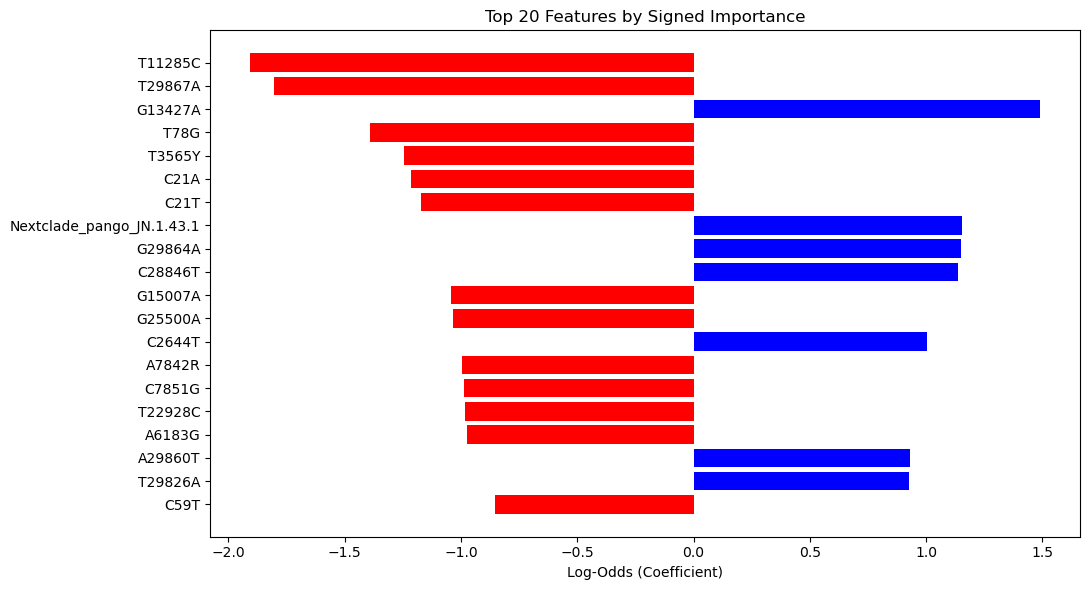

In [53]:
import matplotlib.pyplot as plt

# Sort by absolute importance, but retain the sign
top20 = features.reindex(features['importance'].abs().sort_values(ascending=False).head(20).index)

# Set color: blue for positive, red for negative coefficients
colors = top20['importance'].apply(lambda x: 'blue' if x > 0 else 'red')

# Plot
plt.figure(figsize=(11, 6))
plt.barh(top20['variables'], top20['importance'], color=colors)
plt.xlabel('Log-Odds (Coefficient)')
plt.title('Top 20 Features by Signed Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.tiff', format='tiff', dpi=600)
plt.show()
